In [2]:
from felpy.model.materials.load_refl import load_refl
from felpy.utils.np_utils import memory_map
import numpy as np
from matplotlib import pyplot as plt
from felpy.utils.vis_utils import Grids
from felpy.model.materials.load_refl import get_refl

def check_material(ekev):
    """
    specific to surfac of mirrors for spb-sfx
    """
    if ekev <= 7.5:
        material = "B4C"
    else: 
        material = "Ru"    
    return material

def rectangular_function(n, w):
    a = np.zeros(n)   # whatever size. initializes to zeros
    a[n//2-w//2:n//2+w//2] = 1.0          # index range sets location, width of impulse
    return a

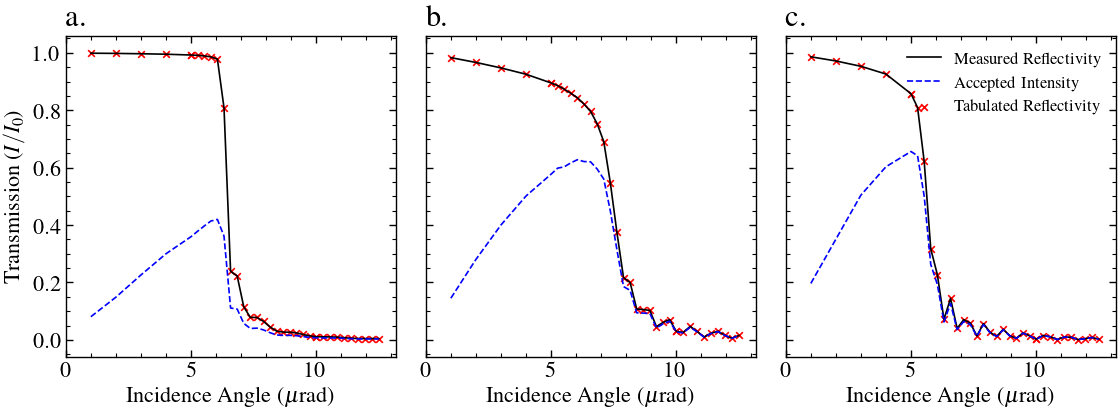

In [30]:

fontsize = 16
ekev = [5.0, 9.2, 12.0]

a = np.linspace(1e-03,5e-03, 5)
b = np.linspace(5e-03,10e-03, 20)
c = np.linspace(10e-03,12.5e-03, 10)

angles = np.concatenate((a,b,c))

data = [memory_map("./results/mirror_transmission_{}keV".format(e), shape = (len(angles),2)) for e in ekev]


grid = Grids(global_aspect = 3, scale = 2)
grid.create_grid(n = 1, m = 3)

for itr, f in enumerate(data):
    
        ax = grid.axes[itr]
        ax.plot(angles*1e3,(data[itr][:,0])**2, linestyle = 'solid', color = 'black', label = 'Measured Reflectivity')
    
        
        refl = load_refl(check_material(ekev[itr]))
        expected_refl = [get_refl(refl, ekev[itr], angle) for angle in angles]

        ax.scatter(angles*1e3, expected_refl, marker = 'x', color = 'red', label = "Tabulated Reflectivity")
        ax.plot(angles*1e3,(data[itr][:,1])**2, linestyle = 'dashed', color = 'blue', label = 'Accepted Intensity')

        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.xaxis.label.set_size(fontsize)
        ax.yaxis.label.set_size(fontsize)
        ax.set_xlabel("Incidence Angle ($\mu$rad)")

grid.axes[-1].legend(fontsize = fontsize-4, loc = 'upper right')
grid.axes[0].set_ylabel("Transmission ($I/I_0$)")

grid.axes[0].text(0,1.1,"a.", horizontalalignment = 'left', verticalalignment = 'top', transform = grid.axes[0].transAxes, fontsize = 22)
grid.axes[1].text(1.09,1.1,"b.", horizontalalignment = 'left', verticalalignment = 'top', transform = grid.axes[0].transAxes, fontsize = 22)
grid.axes[2].text(2.18,1.1,"c.", horizontalalignment = 'left', verticalalignment = 'top', transform = grid.axes[0].transAxes, fontsize = 22)

for ax in grid.axes:
    ax.set_xticks([0,5,10])

grid.savefig("./images/mirror_transmission.png")

### 